<p style="text-align: center; font-family: Times New Roman">Ecole nationale de la Statistique et de l'Analyse économique - Pierre NDIAYE</p>

<p style="text-align: center; margin-up: 1000px; font-size: 1rem; font-family: Times New Roman">
<b>Rédigé par :</b><br>
Mouhamadi Bassirou COMPAORE<br>
Maty NDIONE<br>
Elèves Ingénieurs Statisticiens Economistes en 2e année
</p>

<h1 style="color:rgb(1, 100, 120); font-family: Georgia;text-align: center;">Modélisation</h1>

In [2]:
!pip install kaggle
!pip install py7zr
!pip install dask
!pip install dask[dataframe]
!pip install pyunpack
!pip install patool
#os.system('apt-get install p7zip')
!pip install -U -q PyDrive
!pip install dask dask-ml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 57.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 4.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of distributed to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.8/149.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1

In [3]:
#from google.colab import files
import os
import py7zr
import os
import dask.dataframe as dd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
#from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/favorita-grocery-sales-forecasting/test.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/stores.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/items.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/holidays_events.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/transactions.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/train.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/oil.csv.7z
/kaggle/input/favorita-grocery-sales-forecasting/sample_submission.csv.7z


In [5]:
import os
import zipfile
import py7zr
import dask.dataframe as dd

# Chemin vers le répertoire des fichiers téléchargés
input_dir = '/kaggle/input/favorita-grocery-sales-forecasting/'

# Chemin vers le répertoire où les fichiers seront extraits
output_dir = '/kaggle/working/'

# Fonction pour décompresser les fichiers .7z
def extract_7z_files(input_dir, output_dir):
    zip_files = [f for f in os.listdir(input_dir) if f.endswith('.7z')]
    if not zip_files:
        print("Aucun fichier .7z trouvé dans le répertoire.")
    else:
        for zip_file in zip_files:
            file_path = os.path.join(input_dir, zip_file)
            try:
                with py7zr.SevenZipFile(file_path, mode='r') as z:
                    z.extractall(path=output_dir)
            except Exception as e:
                print(f"Erreur lors de la décompression de {zip_file}: {e}")

# Fonction pour décompresser les fichiers .zip
def extract_zip_files(input_dir, output_dir):
    zip_files = [f for f in os.listdir(input_dir) if f.endswith('.zip')]
    if not zip_files:
        print("Aucun fichier .zip trouvé dans le répertoire.")
    else:
        for zip_file in zip_files:
            file_path = os.path.join(input_dir, zip_file)
            try:
                with zipfile.ZipFile(file_path, 'r') as zip_ref:
                    zip_ref.extractall(output_dir)
            except Exception as e:
                print(f"Erreur lors de la décompression de {zip_file}: {e}")

# Extraction des fichiers
extract_7z_files(input_dir, output_dir)
extract_zip_files(input_dir, output_dir)

Aucun fichier .zip trouvé dans le répertoire.


In [6]:
# Vérifier les fichiers extraits
extracted_files = os.listdir(output_dir)
print(extracted_files)

# Lire les fichiers CSV avec Dask
csv_files = [f for f in extracted_files if f.endswith('.csv')]

data = {}
for csv_file in csv_files:
    file_path = os.path.join(output_dir, csv_file)
    try:
        df = dd.read_csv(file_path, assume_missing=True)
        data[csv_file.replace('.csv', '')] = df
    except Exception as e:
        print(f"Erreur lors de la lecture de {csv_file}: {e}")

# Afficher les données des fichiers CSV
for csv_file in csv_files:
    file_path = os.path.join(output_dir, csv_file)
    try:
        df = dd.read_csv(file_path, dtype={"onpromotion": "object"}, assume_missing=True)
        print(f"Contenu du fichier {csv_file}:")
        print(df.head())
    except Exception as e:
        print(f"Erreur lors de la lecture de {csv_file}: {e}")


['transactions.csv', 'oil.csv', '.virtual_documents', 'train.csv', 'test.csv', 'stores.csv', 'holidays_events.csv', 'items.csv', 'sample_submission.csv']
Contenu du fichier transactions.csv:
         date  store_nbr  transactions
0  2013-01-01       25.0         770.0
1  2013-01-02        1.0        2111.0
2  2013-01-02        2.0        2358.0
3  2013-01-02        3.0        3487.0
4  2013-01-02        4.0        1922.0
Contenu du fichier oil.csv:
         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20
Contenu du fichier train.csv:
    id        date  store_nbr  item_nbr  unit_sales onpromotion
0  0.0  2013-01-01       25.0  103665.0         7.0         NaN
1  1.0  2013-01-01       25.0  105574.0         1.0         NaN
2  2.0  2013-01-01       25.0  105575.0         2.0         NaN
3  3.0  2013-01-01       25.0  108079.0         1.0         NaN
4  4.0  2013-01-01       25.0  108701.0  

/opt/conda/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/opt/conda/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


**Etape2: Préparation des données**

In [7]:
# Fusionner les DataFrames
train = data['train']
items = data['items']
stores = data['stores']
holidays_events = data['holidays_events']
transactions = data['transactions']
oil = data['oil']

# Fusionner les données de ventes avec les informations sur les articles et les magasins
train = train.merge(items, on='item_nbr', how='left')
train = train.merge(stores, on='store_nbr', how='left')

# Fusionner les données de ventes avec les informations sur les transactions
train = train.merge(transactions, on=['date', 'store_nbr'], how='left')

# Fusionner les données de ventes avec les informations sur les jours fériés et les événements
train = train.merge(holidays_events, on='date', how='left')

# Fusionner les données de ventes avec les informations sur le prix du pétrole
train = train.merge(oil, on='date', how='left')

# Afficher les premières lignes du DataFrame fusionné
print(train.head())


    id        date  store_nbr  item_nbr  unit_sales  onpromotion  \
0  0.0  2013-01-01       25.0  103665.0         7.0          NaN   
1  1.0  2013-01-01       25.0  105574.0         1.0          NaN   
2  2.0  2013-01-01       25.0  105575.0         2.0          NaN   
3  3.0  2013-01-01       25.0  108079.0         1.0          NaN   
4  4.0  2013-01-01       25.0  108701.0         1.0          NaN   

         family   class  perishable     city        state type_x  cluster  \
0  BREAD/BAKERY  2712.0         1.0  Salinas  Santa Elena      D      1.0   
1     GROCERY I  1045.0         0.0  Salinas  Santa Elena      D      1.0   
2     GROCERY I  1045.0         0.0  Salinas  Santa Elena      D      1.0   
3     GROCERY I  1030.0         0.0  Salinas  Santa Elena      D      1.0   
4          DELI  2644.0         1.0  Salinas  Santa Elena      D      1.0   

   transactions   type_y    locale locale_name         description  \
0         770.0  Holiday  National     Ecuador  Primer dia

In [8]:
# Assurez-vous que les données sont chargées dans 'data'
test = data['test']
items = data['items']
stores = data['stores']
holidays_events = data['holidays_events']
transactions = data['transactions']
oil = data['oil']

# Fusionner les données de test avec les informations sur les articles et les magasins
test = test.merge(items, on='item_nbr', how='left')
test = test.merge(stores, on='store_nbr', how='left')

# Fusionner les données de test avec les informations sur les transactions
test = test.merge(transactions, on=['date', 'store_nbr'], how='left')

# Fusionner les données de test avec les informations sur les jours fériés et les événements
test = test.merge(holidays_events, on='date', how='left')

# Fusionner les données de test avec les informations sur le prix du pétrole
test = test.merge(oil, on='date', how='left')

# Afficher les premières lignes du DataFrame fusionné
print(test.head())


            id        date  store_nbr  item_nbr  onpromotion        family  \
0  125497040.0  2017-08-16        1.0   96995.0        False     GROCERY I   
1  125497041.0  2017-08-16        1.0   99197.0        False     GROCERY I   
2  125497042.0  2017-08-16        1.0  103501.0        False      CLEANING   
3  125497043.0  2017-08-16        1.0  103520.0        False     GROCERY I   
4  125497044.0  2017-08-16        1.0  103665.0        False  BREAD/BAKERY   

    class  perishable   city      state type_x  cluster  transactions type_y  \
0  1093.0         0.0  Quito  Pichincha      D     13.0           NaN    NaN   
1  1067.0         0.0  Quito  Pichincha      D     13.0           NaN    NaN   
2  3008.0         0.0  Quito  Pichincha      D     13.0           NaN    NaN   
3  1028.0         0.0  Quito  Pichincha      D     13.0           NaN    NaN   
4  2712.0         1.0  Quito  Pichincha      D     13.0           NaN    NaN   

  locale locale_name description transferred  dcoi

In [9]:
# Suppression des valeurs manquantes
train = train.dropna(subset=['onpromotion', 'dcoilwtico', 'transactions', 'transferred', 'locale_name', 'description', 'locale', 'type_y'])
test = test.dropna(subset=['onpromotion', 'dcoilwtico', 'transactions', 'transferred', 'locale_name', 'description', 'locale', 'type_y'])

In [10]:
# Calcul du nombre de NA par colonne
na_counts = train.isna().sum().compute()

# Affichage des résultats
print("Nombre de valeurs manquantes (NA) par colonne :")
print(na_counts)

# Calcul du nombre de NA par colonne
na_count = test.isna().sum().compute()

# Affichage des résultats
print("Nombre de valeurs manquantes (NA) par colonne :")
print(na_count)


Nombre de valeurs manquantes (NA) par colonne :
id              0
date            0
store_nbr       0
item_nbr        0
unit_sales      0
onpromotion     0
family          0
class           0
perishable      0
city            0
state           0
type_x          0
cluster         0
transactions    0
type_y          0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
dtype: int64
Nombre de valeurs manquantes (NA) par colonne :
id              0
date            0
store_nbr       0
item_nbr        0
onpromotion     0
family          0
class           0
perishable      0
city            0
state           0
type_x          0
cluster         0
transactions    0
type_y          0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
dtype: int64


/opt/conda/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/opt/conda/lib/python3.10/site-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


In [11]:
print(len(train))

print(len(test))


12560600
0


In [12]:
# Trier les données par date en ordre décroissant pour obtenir les observations les plus récentes en premier
train = train.sort_values(by='date', ascending=False)

# 4. Sélectionner les 5% les plus récentes
train_model = train.head(int(len(train) * 0.16))
train_model.info()

# Trier les données par date en ordre décroissant pour obtenir les observations les plus récentes en premier
test = test.sort_values(by='date', ascending=False)

# 4. Sélectionner les 5% les plus récentes
test_model = test.head(int(len(test) * 0.16))
test_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009696 entries, 1499187 to 1374195
Data columns (total 20 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            float64
 1   date          object 
 2   store_nbr     float64
 3   item_nbr      float64
 4   unit_sales    float64
 5   onpromotion   float64
 6   family        object 
 7   class         float64
 8   perishable    float64
 9   city          object 
 10  state         object 
 11  type_x        object 
 12  cluster       float64
 13  transactions  float64
 14  type_y        object 
 15  locale        object 
 16  locale_name   object 
 17  description   object 
 18  transferred   object 
 19  dcoilwtico    float64
dtypes: float64(10), object(10)
memory usage: 322.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            0 non-null      float64
 1   date          

In [13]:
# Sauvegarder le DataFrame train_model sous forme de fichier CSV
train_model.to_csv('/kaggle/working/train_model.csv', index=False,mode='w')
print("Le fichier CSV a été sauvegardé dans l'environnement Kaggle.")

# Sauvegarder le DataFrame train_model sous forme de fichier CSV
test_model.to_csv('/kaggle/working/test_model.csv', index=False,mode='w')
print("Le fichier CSV a été sauvegardé dans l'environnement Kaggle.")


Le fichier CSV a été sauvegardé dans l'environnement Kaggle.
Le fichier CSV a été sauvegardé dans l'environnement Kaggle.


In [14]:
import dask.dataframe as dd

# Charger le fichier train_model.csv en utilisant Dask
train_model = dd.read_csv('/kaggle/working/train_model.csv')
test_model = dd.read_csv('/kaggle/working/test_model.csv')

# Fonction pour convertir la colonne 'date' en type datetime et extraire des fonctionnalités
def preprocess_date(df):
    df['date'] = dd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek
    return df

# Exemple d'utilisation de la fonction preprocess_date
train_model = preprocess_date(train_model)
test_model = preprocess_date(test_model)

# Afficher les premières lignes du DataFrame après prétraitement
print(train_model.head())
print(test_model.head())

# Sauvegarder le DataFrame prétraité sous forme de fichier CSV
output_file = '/kaggle/working/train_model_preprocessed.csv'
train_model.compute().to_csv(output_file, index=False)
print(f"Le fichier prétraité a été sauvegardé sous {output_file}")

# Sauvegarder le DataFrame prétraité sous forme de fichier CSV
output_files = '/kaggle/working/test_model_preprocessed.csv'
train_model.compute().to_csv(output_files, index=False)
print(f"Le fichier prétraité a été sauvegardé sous {output_files}")

            id       date  store_nbr   item_nbr  unit_sales  onpromotion  \
0  125458564.0 2017-08-15       37.0  1037857.0         4.0          0.0   
1  125497024.0 2017-08-15       54.0  2081056.0         1.0          0.0   
2  125497035.0 2017-08-15       54.0  2089339.0         4.0          0.0   
3  125497034.0 2017-08-15       54.0  2089036.0         4.0          0.0   
4  125497033.0 2017-08-15       54.0  2088922.0         7.0          0.0   

           family   class  perishable       city  ...   type_y locale  \
0       BEVERAGES  1120.0         0.0     Cuenca  ...  Holiday  Local   
1  PREPARED FOODS  2986.0         1.0  El Carmen  ...  Holiday  Local   
2       GROCERY I  1006.0         0.0  El Carmen  ...  Holiday  Local   
3       GROCERY I  1034.0         0.0  El Carmen  ...  Holiday  Local   
4       GROCERY I  1076.0         0.0  El Carmen  ...  Holiday  Local   

   locale_name            description transferred dcoilwtico  year month  day  \
0     Riobamba  Fundaci

In [15]:
import pandas as pd
train_model_preprocessed = pd.read_csv('/kaggle/working/train_model_preprocessed.csv')
test_model_preprocessed = pd.read_csv('/kaggle/working/test_model_preprocessed.csv')

# Supprimer la colonne 'date' 'day','dayofweek'
train_model_preprocessed = train_model_preprocessed.drop(columns=['date','day','dayofweek'])
test_model_preprocessed = test_model_preprocessed.drop(columns=['date','day','dayofweek'])


# Sauvegarder le DataFrame train_model_preprocessed sous forme de fichier CSV, en remplaçant le fichier existant
train_model_preprocessed.to_csv('/kaggle/working/train_model_preprocessed.csv', index=False, mode='w')
print("Le fichier CSV a été sauvegardé dans l'environnement Kaggle.")

# Sauvegarder le DataFrame train_model_preprocessed sous forme de fichier CSV, en remplaçant le fichier existant
test_model_preprocessed.to_csv('/kaggle/working/test_model_preprocessed.csv', index=False, mode='w')

# Afficher les informations sur les données sélectionnées
train_model_preprocessed.info()
test_model_preprocessed.info()


Le fichier CSV a été sauvegardé dans l'environnement Kaggle.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009696 entries, 0 to 2009695
Data columns (total 21 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            float64
 1   store_nbr     float64
 2   item_nbr      float64
 3   unit_sales    float64
 4   onpromotion   float64
 5   family        object 
 6   class         float64
 7   perishable    float64
 8   city          object 
 9   state         object 
 10  type_x        object 
 11  cluster       float64
 12  transactions  float64
 13  type_y        object 
 14  locale        object 
 15  locale_name   object 
 16  description   object 
 17  transferred   bool   
 18  dcoilwtico    float64
 19  year          int64  
 20  month         int64  
dtypes: bool(1), float64(10), int64(2), object(8)
memory usage: 308.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009696 entries, 0 to 2009695
Data columns (total 21 columns):
 #   Column       

# 1

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Charger le fichier train_model_preprocessed.csv
train_model_preprocessed = pd.read_csv('/kaggle/working/train_model_preprocessed.csv')

# Sélectionner les colonnes numériques à standardiser
numeric_columns = ['id', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
                   'class', 'perishable', 'cluster', 'transactions', 'dcoilwtico', 'year', 'month']

# Initialiser le StandardScaler
std_scaler = StandardScaler()

# Standardiser les colonnes numériques
train_model_preprocessed[numeric_columns] = std_scaler.fit_transform(train_model_preprocessed[numeric_columns])

# Vérifier les types de colonnes après standardisation
print(train_model_preprocessed.dtypes)

# Encodage one-hot des colonnes catégorielles
categorical_columns = ['family', 'city', 'state', 'type_x', 'type_y', 'locale', 'locale_name', 'description', 'transferred']
train_model_preprocessed = pd.get_dummies(train_model_preprocessed, columns=categorical_columns, drop_first=True)

# Afficher les premières lignes du DataFrame
print(train_model_preprocessed.head())


id              float64
store_nbr       float64
item_nbr        float64
unit_sales      float64
onpromotion     float64
family           object
class           float64
perishable      float64
city             object
state            object
type_x           object
cluster         float64
transactions    float64
type_y           object
locale           object
locale_name      object
description      object
transferred        bool
dcoilwtico      float64
year            float64
month           float64
dtype: object
         id  store_nbr  item_nbr  unit_sales  onpromotion     class  \
0  1.422190   0.537883 -0.208989   -0.164943     -0.39383 -0.707526   
1  1.426914   1.582095  1.588561   -0.275765     -0.39383  0.847046   
2  1.426915   1.582095  1.602833   -0.164943     -0.39383 -0.802500   
3  1.426915   1.582095  1.602311   -0.164943     -0.39383 -0.779173   
4  1.426915   1.582095  1.602115   -0.054121     -0.39383 -0.744182   

   perishable   cluster  transactions  dcoilwtico  ... 

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Charger le fichier test_model_preprocessed.csv
test_model_preprocessed = pd.read_csv('/kaggle/working/test_model_preprocessed.csv')

# Sélectionner les colonnes numériques à standardiser
numeric_columns = ['id', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
                   'class', 'perishable', 'cluster', 'transactions', 'dcoilwtico', 'year', 'month']

# Initialiser le StandardScaler
std_scaler = StandardScaler()

# Standardiser les colonnes numériques
test_model_preprocessed[numeric_columns] = std_scaler.fit_transform(test_model_preprocessed[numeric_columns])

# Vérifier les types de colonnes après standardisation
print(test_model_preprocessed.dtypes)

# Encodage one-hot des colonnes catégorielles
categorical_columns = ['family', 'city', 'state', 'type_x', 'type_y', 'locale', 'locale_name', 'description', 'transferred']
test_model_preprocessed = pd.get_dummies(test_model_preprocessed, columns=categorical_columns, drop_first=True)

# Afficher les premières lignes du DataFrame
print(test_model_preprocessed.head())


id              float64
store_nbr       float64
item_nbr        float64
unit_sales      float64
onpromotion     float64
family           object
class           float64
perishable      float64
city             object
state            object
type_x           object
cluster         float64
transactions    float64
type_y           object
locale           object
locale_name      object
description      object
transferred        bool
dcoilwtico      float64
year            float64
month           float64
dtype: object
         id  store_nbr  item_nbr  unit_sales  onpromotion     class  \
0  1.422190   0.537883 -0.208989   -0.164943     -0.39383 -0.707526   
1  1.426914   1.582095  1.588561   -0.275765     -0.39383  0.847046   
2  1.426915   1.582095  1.602833   -0.164943     -0.39383 -0.802500   
3  1.426915   1.582095  1.602311   -0.164943     -0.39383 -0.779173   
4  1.426915   1.582095  1.602115   -0.054121     -0.39383 -0.744182   

   perishable   cluster  transactions  dcoilwtico  ... 

In [18]:
#columns_to_drop = ['date']
#train_model_preprocessed = train_model_preprocessed.drop(columns=columns_to_drop)

print(train_model_preprocessed.columns)
print(test_model_preprocessed.columns)


Index(['id', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion', 'class',
       'perishable', 'cluster', 'transactions', 'dcoilwtico',
       ...
       'description_Fundacion de Guayaquil-1',
       'description_Fundacion de Manta', 'description_Fundacion de Riobamba',
       'description_Navidad-2', 'description_Navidad-3',
       'description_Navidad-4', 'description_Primer Grito de Independencia',
       'description_Traslado Batalla de Pichincha',
       'description_Traslado Primer Grito de Independencia',
       'transferred_True'],
      dtype='object', length=112)
Index(['id', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion', 'class',
       'perishable', 'cluster', 'transactions', 'dcoilwtico',
       ...
       'description_Fundacion de Guayaquil-1',
       'description_Fundacion de Manta', 'description_Fundacion de Riobamba',
       'description_Navidad-2', 'description_Navidad-3',
       'description_Navidad-4', 'description_Primer Grito de Independencia',
       'd

In [19]:
# Calculer la matrice de corrélation
correlation_matrix = train_model_preprocessed.corr()

# Afficher la matrice de corrélation
print(correlation_matrix)


                                                          id  store_nbr  \
id                                                  1.000000  -0.000095   
store_nbr                                          -0.000095   1.000000   
item_nbr                                            0.019262   0.009774   
unit_sales                                         -0.040087   0.046127   
onpromotion                                        -0.030399  -0.000650   
...                                                      ...        ...   
description_Navidad-4                              -0.153768   0.124829   
description_Primer Grito de Independencia           0.308113   0.000613   
description_Traslado Batalla de Pichincha           0.089223   0.004204   
description_Traslado Primer Grito de Independencia  0.320851   0.005140   
transferred_True                                    0.206907  -0.003866   

                                                    item_nbr  unit_sales  \
id                     

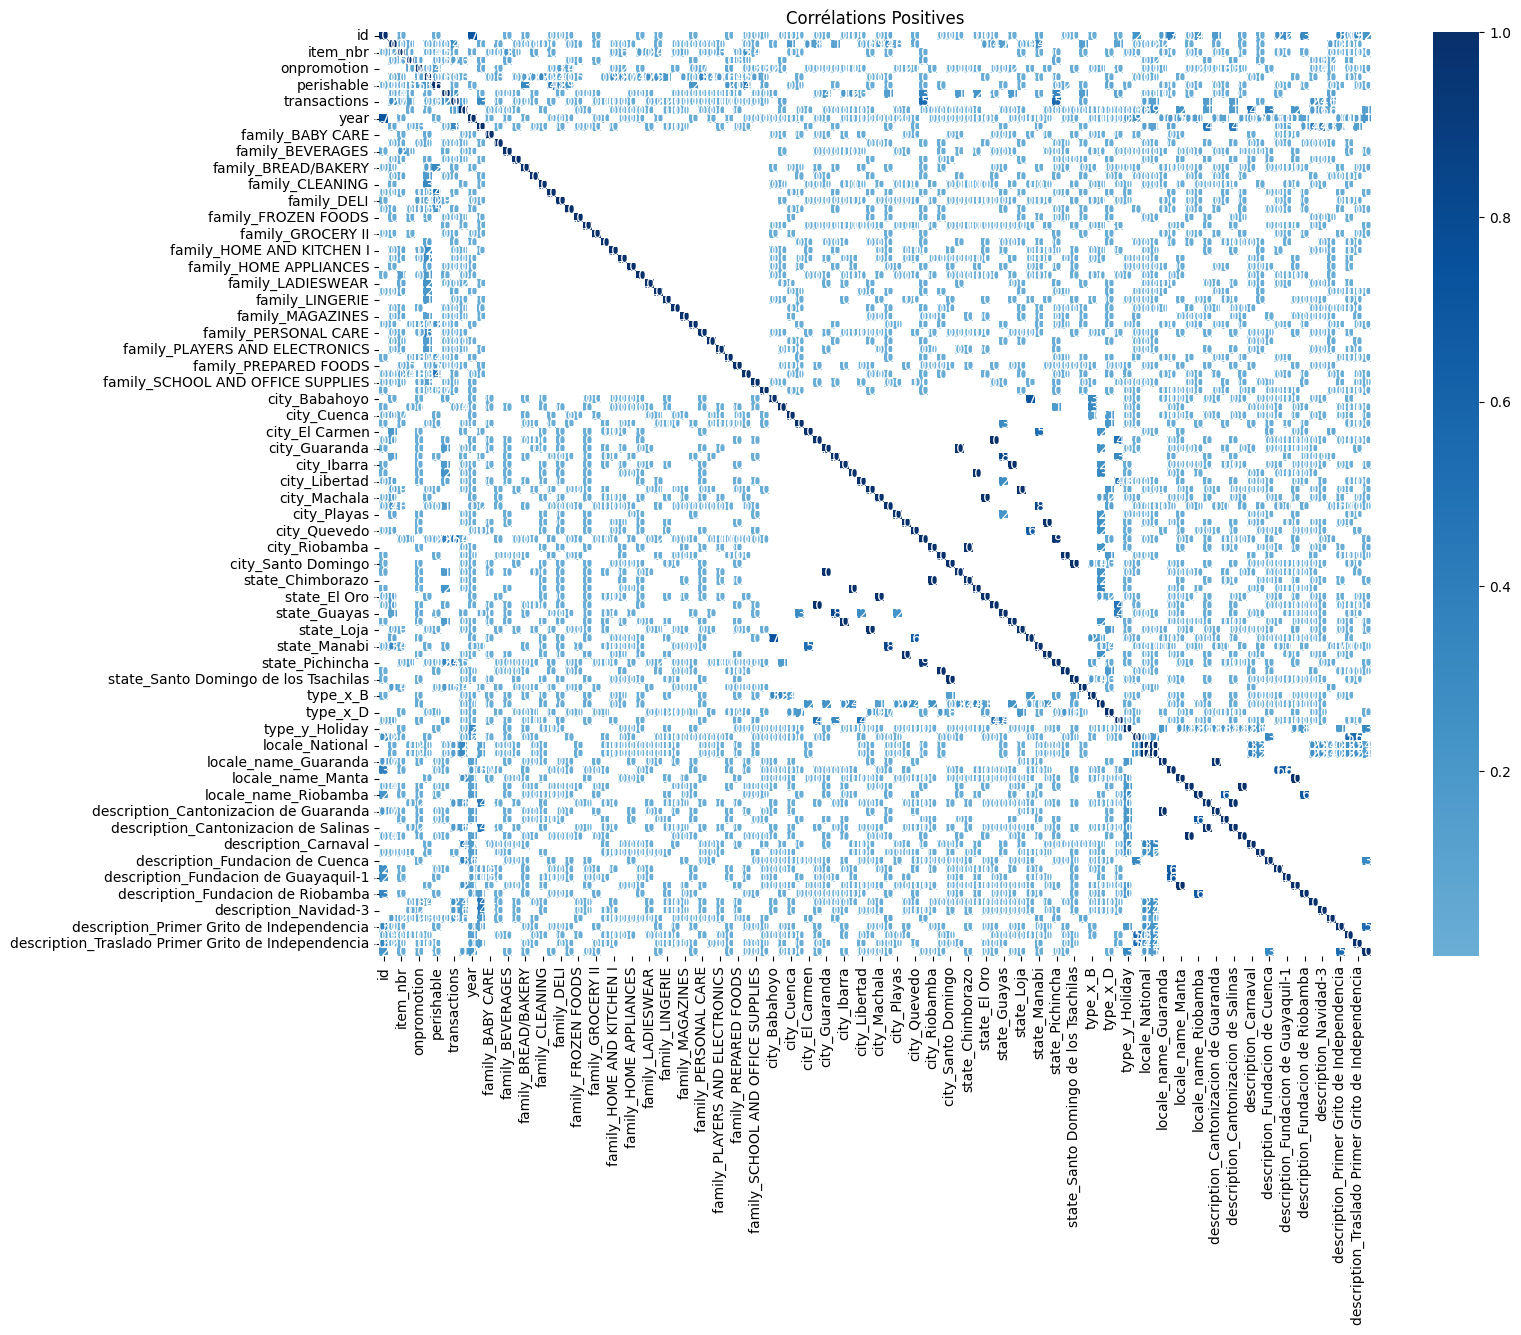

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

positive_correlations = correlation_matrix[correlation_matrix > 0]

# Heatmap des corrélations positives
plt.figure(figsize=(16, 12))
sns.heatmap(positive_correlations, annot=True, cmap='Blues', fmt='.2f', center=0)
plt.title('Corrélations Positives')
plt.show()

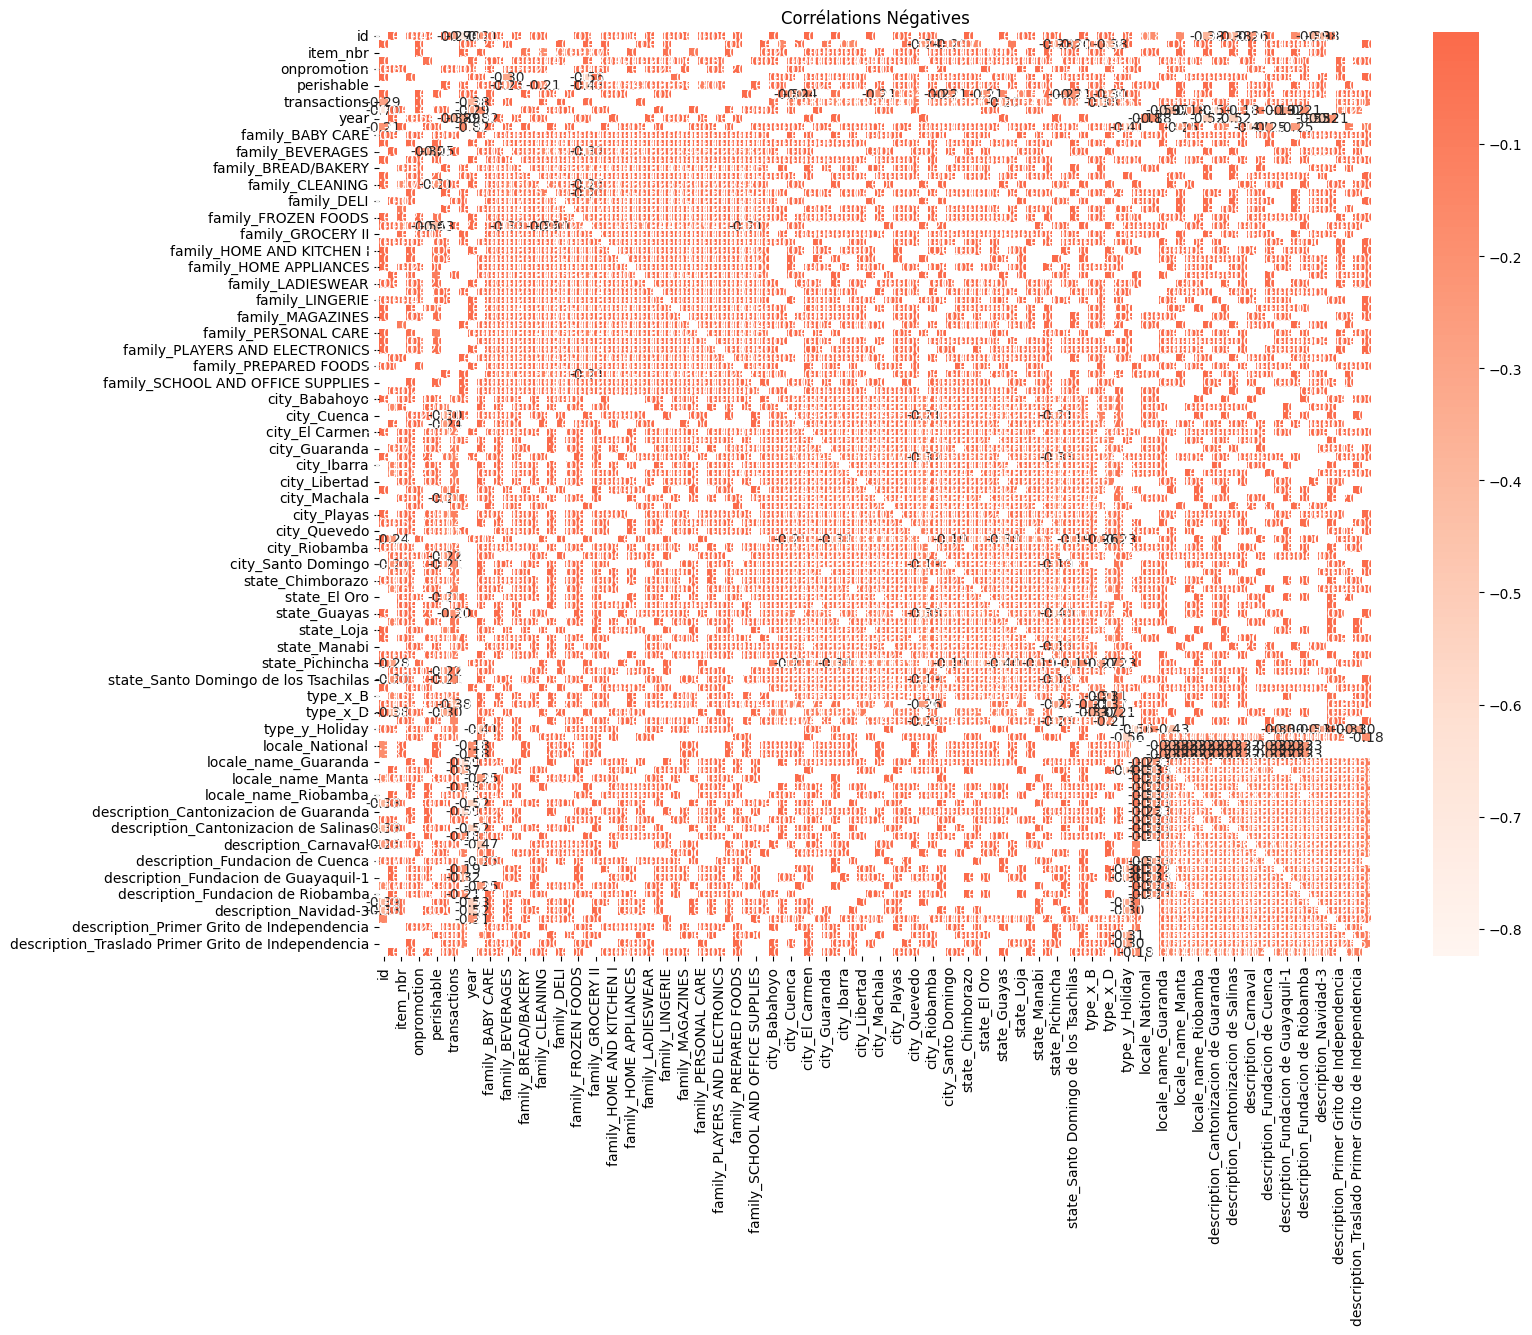

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

negative_correlations = correlation_matrix[correlation_matrix < 0]

# Heatmap des corrélations négatives
plt.figure(figsize=(16, 12))
sns.heatmap(negative_correlations, annot=True, cmap='Reds', fmt='.2f', center=0)
plt.title('Corrélations Négatives')
plt.show()


# TEST

In [22]:
# Calculer la matrice de corrélation
correlation_matrix1 = test_model_preprocessed.corr()

# Afficher la matrice de corrélation
print(correlation_matrix1)


                                                          id  store_nbr  \
id                                                  1.000000  -0.000095   
store_nbr                                          -0.000095   1.000000   
item_nbr                                            0.019262   0.009774   
unit_sales                                         -0.040087   0.046127   
onpromotion                                        -0.030399  -0.000650   
...                                                      ...        ...   
description_Navidad-4                              -0.153768   0.124829   
description_Primer Grito de Independencia           0.308113   0.000613   
description_Traslado Batalla de Pichincha           0.089223   0.004204   
description_Traslado Primer Grito de Independencia  0.320851   0.005140   
transferred_True                                    0.206907  -0.003866   

                                                    item_nbr  unit_sales  \
id                     

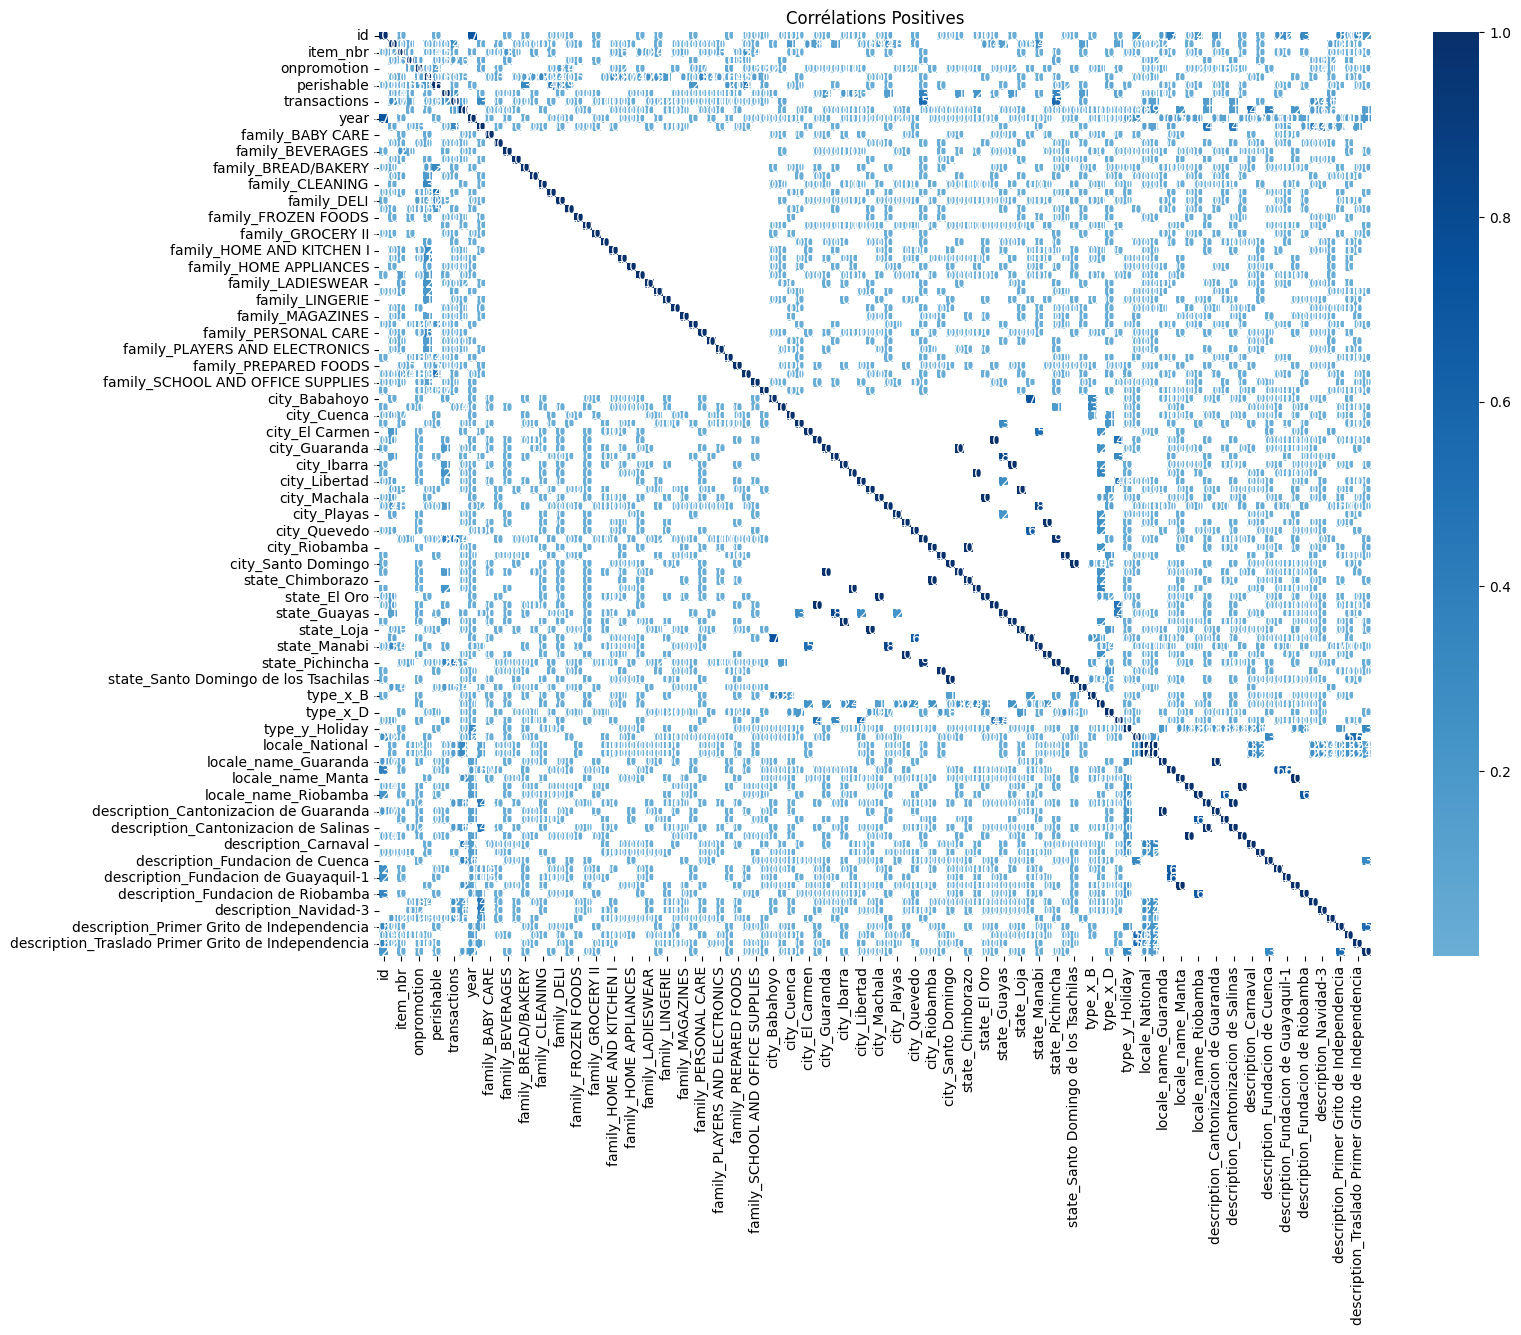

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

positive_correlations = correlation_matrix1[correlation_matrix1 > 0]

# Heatmap des corrélations positives
plt.figure(figsize=(16, 12))
sns.heatmap(positive_correlations, annot=True, cmap='Blues', fmt='.2f', center=0)
plt.title('Corrélations Positives')
plt.show()

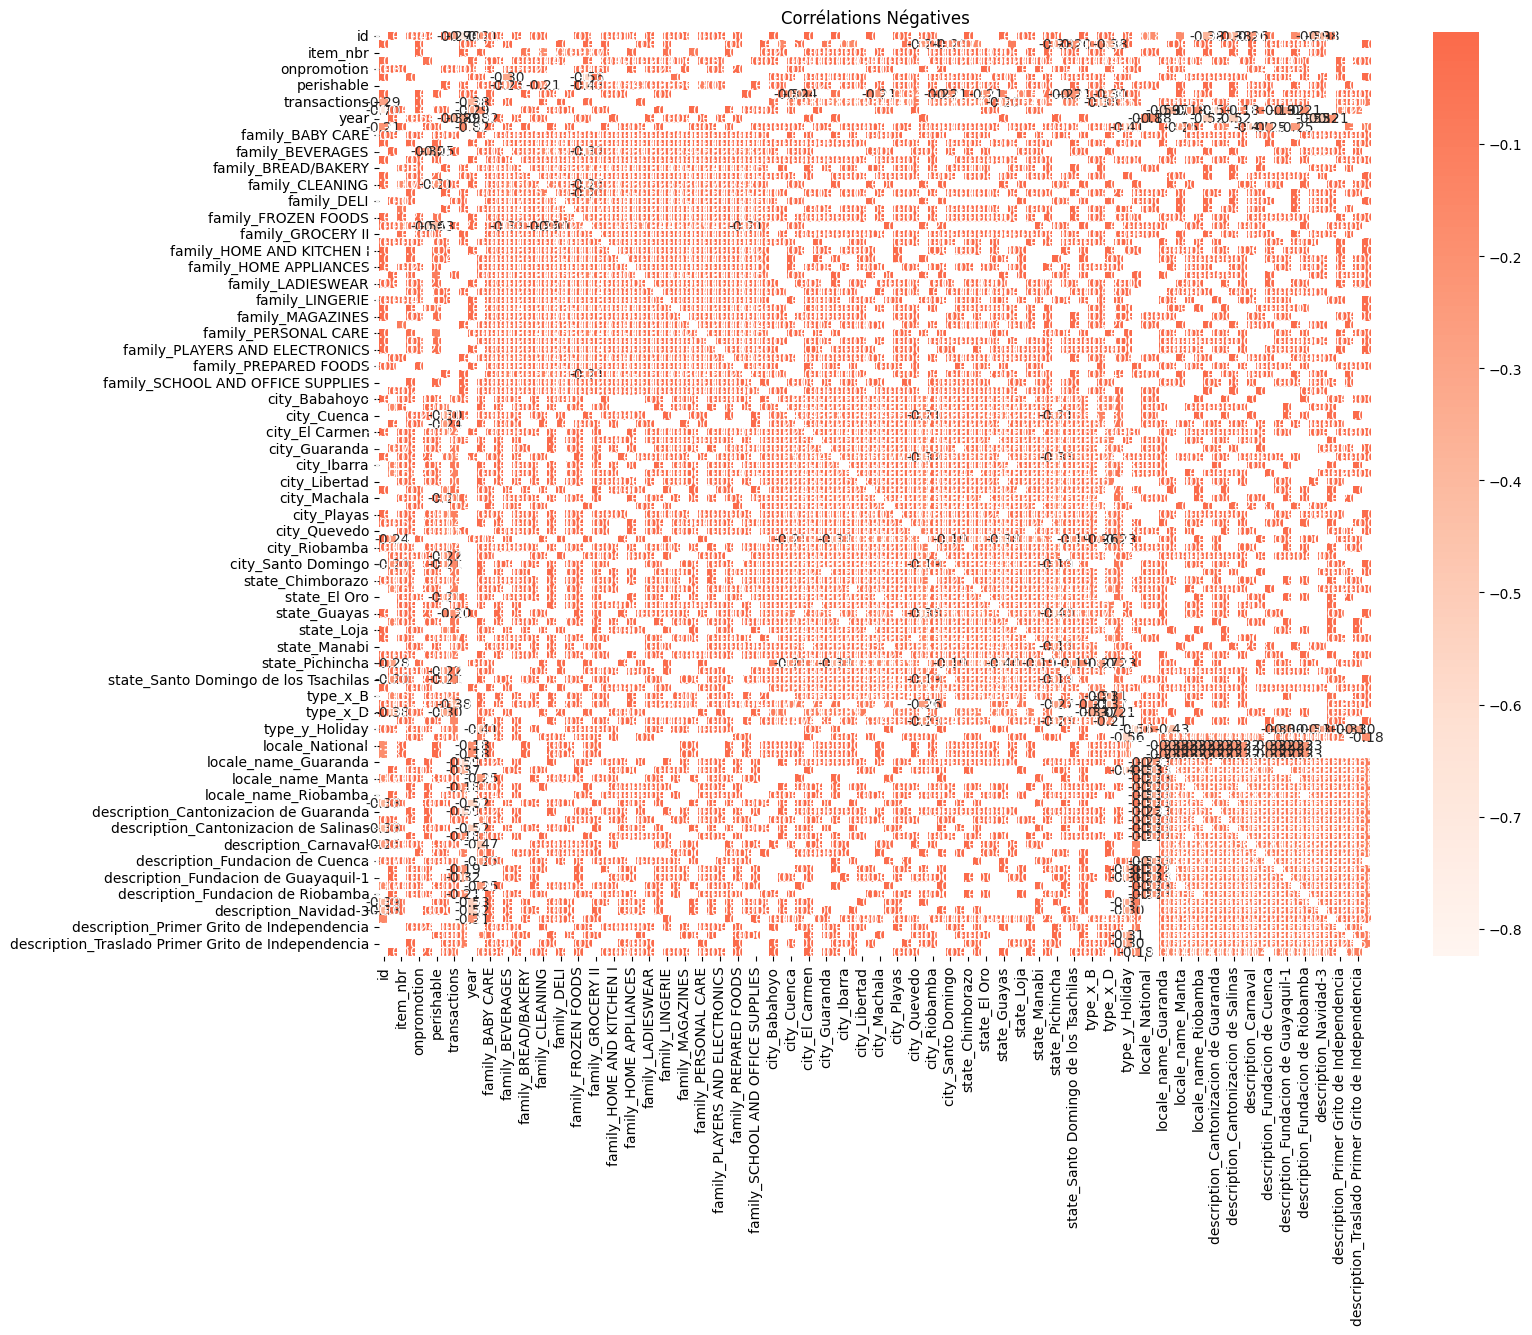

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

negative_correlations = correlation_matrix1[correlation_matrix1 < 0]

# Heatmap des corrélations négatives
plt.figure(figsize=(16, 12))
sns.heatmap(negative_correlations, annot=True, cmap='Reds', fmt='.2f', center=0)
plt.title('Corrélations Négatives')
plt.show()


# Modele 1

# Choix des parametres

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
import pandas as pd

# Charger les données
train_model_preprocessed = pd.read_csv('/kaggle/working/train_model_preprocessed.csv')

# Auto-ARIMA pour trouver les meilleurs paramètres
auto_model = auto_arima(train_model_preprocessed['unit_sales'],
                        seasonal=True,  # Prendre en compte la saisonnalité
                        m=12,  # Saisonnalité hebdomadaire
                        trace=True,  # Afficher les essais de paramètres
                        stepwise=True,  # Méthode de recherche optimisée
                        suppress_warnings=True)

print(auto_model.summary())


Performing stepwise search to minimize aic


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Charger le fichier train_model_preprocessed.csv en utilisant Dask
train_model_preprocessed = pd.read_csv('/kaggle/working/train_model_preprocessed.csv')

# Ajuster le modèle SARIMA
model = SARIMAX(train_model_preprocessed['unit_sales'], 
                order=(1, 1, 1),  # Paramètres ARIMA
                seasonal_order=(1, 1, 1, 7),  # Paramètres saisonniers (7 jours pour la saisonnalité hebdomadaire)
                enforce_stationarity=False,
                enforce_invertibility=False)
sarima_model = model.fit(maxiter=100)


In [ ]:
# Afficher les résultats du modèle
print(sarima_model.summary())

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Prédire sur l'échantillon de test
predictions = sarima_model.predict(start=len(test_model_preprocessed)-100,  # Exemple sur 100 derniers points
                                   end=len(test_model_preprocessed)-1)

# Calculer le RMSE
rmse = np.sqrt(mean_squared_error(test_model_preprocessed['unit_sales'][-100:], predictions))
print("RMSE:", rmse)


# 2

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Ajuster le modèle ARIMA
model_arima = ARIMA(train_model_preprocessed['unit_sales'], order=(1,1,7))
results_arima = model_arima.fit()
print(results_arima.summary())


# 3

In [ ]:
#Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ajuster le modèle de lissage exponentiel
model_es = ExponentialSmoothing(train_model_preprocessed['unit_sales'], seasonal='add', seasonal_periods=7)
results_es = model_es.fit()
print(results_es.summary())
